In [7]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Get the dataset

dataset = pd.read_csv("..\data\COUR_210401_220522_30min.csv")
dataset.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.COUR,15,20210401,164500,45.5000,45.90,43.2701,45.2280,316139
1,US1.COUR,15,20210401,170000,45.1671,48.70,45.1500,48.6000,273807
2,US1.COUR,15,20210401,171500,48.5900,51.45,48.1500,48.6249,494088
3,US1.COUR,15,20210401,173000,48.9900,50.49,48.3700,49.7700,256379
4,US1.COUR,15,20210401,174500,49.7700,54.39,49.6400,54.1006,644147


In [9]:
# Rename columns and remove redandunt ones

dataset.columns = [x[1:-1].capitalize() for x in dataset.columns]
dataset.drop(columns=["Ticker", "Per"], inplace = True)
dataset.loc[dataset["Time"] == 0, "Time"] = "000000"
dataset.tail()

,Date,Time,Open,High,Low,Close,Vol
7122,20220520,220000,15.230,15.310,15.230,15.31,1100
7123,20220520,221500,15.245,15.245,15.180,15.18,2293
7124,20220520,223000,15.280,15.350,15.275,15.35,500
7125,20220520,224500,15.420,15.550,15.390,15.52,1721
7126,20220520,230000,15.520,15.540,15.460,15.54,2854


In [10]:
# Convert date and time columns into datetime format

dataset["Date and Time"] = [str(x) + " " + str(y) for x, y in zip(dataset.Date, dataset.Time)]
dataset["Date and Time"] = pd.to_datetime(dataset["Date and Time"], format="%Y%m%d %H%M%S")
dataset.set_index(dataset["Date and Time"], inplace = True)
dataset.drop(columns = ["Date", "Time", "Date and Time"], inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7127 entries, 2021-04-01 16:45:00 to 2022-05-20 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7127 non-null   float64
 1   High    7127 non-null   float64
 2   Low     7127 non-null   float64
 3   Close   7127 non-null   float64
 4   Vol     7127 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 334.1 KB


In [11]:
dataset

,Open,High,Low,Close,Vol
Date and Time,,,,,
2021-04-01 16:45:00,45.5000,45.900,43.2701,45.2280,316139
2021-04-01 17:00:00,45.1671,48.700,45.1500,48.6000,273807
2021-04-01 17:15:00,48.5900,51.450,48.1500,48.6249,494088
2021-04-01 17:30:00,48.9900,50.490,48.3700,49.7700,256379
2021-04-01 17:45:00,49.7700,54.390,49.6400,54.1006,644147
...,...,...,...,...,...
2022-05-20 22:00:00,15.2300,15.310,15.2300,15.3100,1100
2022-05-20 22:15:00,15.2450,15.245,15.1800,15.1800,2293
2022-05-20 22:30:00,15.2800,15.350,15.2750,15.3500,500


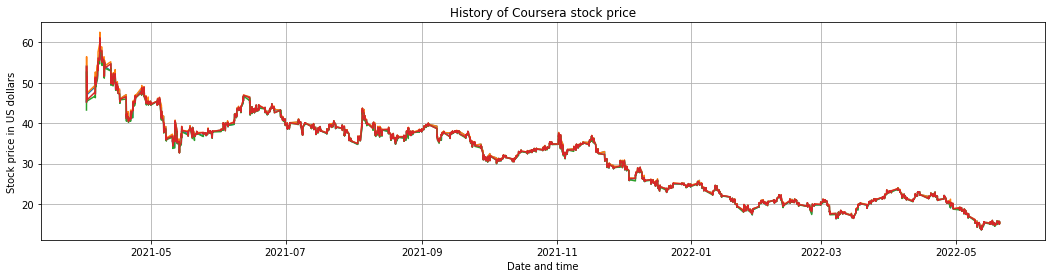

In [17]:
plt.figure(figsize = (18, 4))
plt.title("History of Coursera stock price")
plt.plot(dataset.index, dataset.Open)
plt.plot(dataset.index, dataset.High)
plt.plot(dataset.index, dataset.Low)
plt.plot(dataset.index, dataset.Close)
plt.xlabel("Date and time")
plt.ylabel("Stock price in US dollars")
plt.grid()
plt.show()

In [22]:
# Time period of the stock price available

period = dataset.index[-1] - dataset.index[0]
print("The period of available stock price history is: {} days.".format(period.days))

The period of available stock price history is: 414 days.


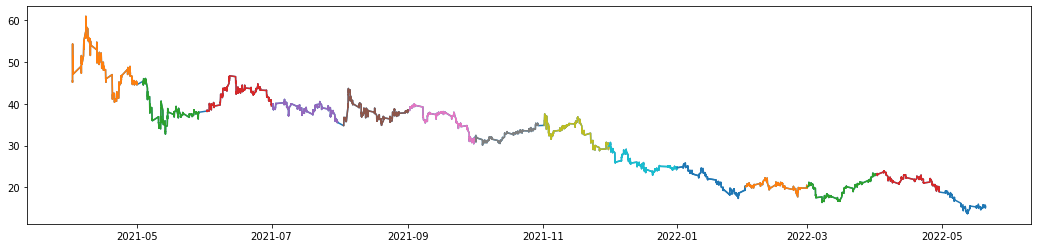

In [29]:
# Create graphs for monthly stock price changes

range_start = 0
plt.figure(figsize = (18, 4))
for i in range(len(dataset.index.month)):
    if dataset.index.month[i] != dataset.index.month[i-1]:
        plt.plot(dataset.index[range_start : i - 1], dataset.Open[range_start : i - 1])
        range_start = i
plt.show()